## Problem 1

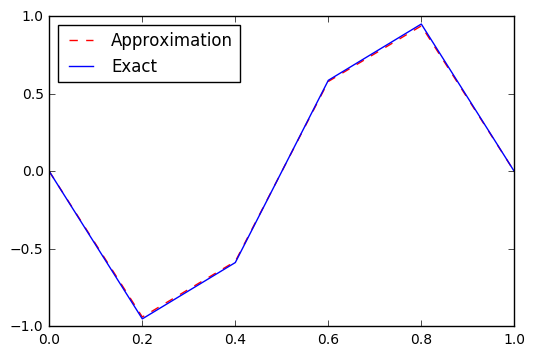

In [5]:
from __future__ import division
import numpy as np
from matplotlib import animation, rcParams, pyplot as plt
rcParams['animation.html'] = 'html5'
#%matplotlib inline

def wave(s,f,g,J,M,T):
    del_t = T/M
    del_x = 1/J
    lmda = s*del_t/del_x

    U = np.zeros(J+1)
    A = np.diag([2*(1-lmda**2)]*len(U)) + np.diag([lmda**2]*(len(U)-1), -1) + np.diag([lmda**2]*(len(U)-1), 1)

    x = np.linspace(0,1,J+1)
    U[1:-1] = f(x[1:-1])

    U0 = U.copy()
    U1 = U.copy()
    U1[1:-1] = U0[1:-1] + g(x[1:-1])*del_t + lmda**2/2*(U0[:-2] - 2*U0[1:-1] + U0[2:])

    U_approx = [U0, U1]
    for i in xrange(2,M+1):
        U0, U1 = U1, A.dot(U1) - U0
        U1[0] = 0
        U1[-1] = 0
        U_approx.append(U1)
        
    return U_approx
    
    
s = 1
f = lambda x : np.sin(2*np.pi*x)
g = lambda x : np.zeros_like(x)

J = 5
M = 5
T = .5
x = np.linspace(0,1,J+1)

U = wave(s,f,g,J,M,T)[-1]
plt.plot(x, U, '--r', label="Approximation")
plt.plot(x, np.sin(2*np.pi*x)*np.cos(2*np.pi*(.5)), label="Exact")
plt.legend(loc='upper left')
plt.show()

## Problem 2  
### NOTE TO JOEY: I chose to extend the time to T=2 to make a clean loop in the animation

In [11]:
def animate(x, U, ylim=(-1,1), interval=15):
    fig = plt.figure()
    plt.axes(xlim=(x[0],x[-1]), ylim=ylim)

    line, = plt.plot([], [])

    def update(i):
        line.set_data(x, U_approx[i])

    return animation.FuncAnimation(fig, update, frames=len(U_approx), interval=interval)

In [12]:
s = 1
m = 20
f = lambda x : .2*np.exp(-m**2*(x-.5)**2)
g = lambda x : -.4*m**2*(x - .5)*np.exp(-m**2*(x-.5)**2)

J = 200
M =  220*2
T = 2

x = np.linspace(0,1,J+1)
U_approx = wave(s,f,g,J,M,T)

animate(x, U)

### Stability condition not met:

In [16]:
s = 1
m = 20
f = lambda x : .2*np.exp(-m**2*(x-.5)**2)
g = lambda x : -.4*m**2*(x - .5)*np.exp(-m**2*(x-.5)**2)

J = 200
M = 180
T = 1

x = np.linspace(0,1,J+1)
U_approx = wave(s,f,g,J,M,T)

animate(x, U_approx)

## Problem 3
### Again, chose to extend the time to make a clean loop

In [15]:
s = 1
m = 20
f = lambda x : .2*np.exp(-m**2*(x-.5)**2)
g = lambda x : np.zeros_like(x)

J = 200
M = 440
T = 2

x = np.linspace(0,1,J+1)
U_approx = wave(s,f,g,J,M,T)

animate(x, U_approx)

## Problem 4

In [29]:
s = 1
f = lambda x : (1/3)*(x<6/11)*(x>=5/11)
g = lambda x : np.zeros_like(x)

J = 200
M = 440
T = 2

x = np.linspace(0,1,J+1)
U_approx = wave(s,f,g,J,M,T)

animate(x, U_approx)